# Ford GoBike Dataset Exploration
## by Mazen Khodier

## Investigation Overview

> Find underlying patterns and interesting characteristics in our dataset Ford GoBike.

## Dataset Overview

> This dataset introduces a bike rental company called FordGoBike. Currently its name is BayWheels as it was changed in May 2019. This dataset is about trips made in 2019 using their service.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
files = ['201901-fordgobike-tripdata.csv',
              '201902-fordgobike-tripdata.csv',
              '201903-fordgobike-tripdata.csv',
              '201904-fordgobike-tripdata.csv',
              '201905-baywheels-tripdata.csv',
              '201906-baywheels-tripdata.csv',
              '201907-baywheels-tripdata.csv',
              '201908-baywheels-tripdata.csv',
              '201909-baywheels-tripdata.csv',
              '201910-baywheels-tripdata.csv',
              '201911-baywheels-tripdata.csv',
               '201912-baywheels-tripdata.csv']
df = pd.concat([pd.read_csv(f,) for f in files], ignore_index=True)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df['day'] = df.start_time.dt.strftime('%a')
df['month'] = df.start_time.dt.strftime('%B')
df['duration_min'] = df['duration_sec'] / 60

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Number of trips per day for each user type

> This visualization shows the number of trips per day for both user types. Subscriber Trips were more frequent on workdays than on weekends while Customers' were more evenly distributed over the whole week.

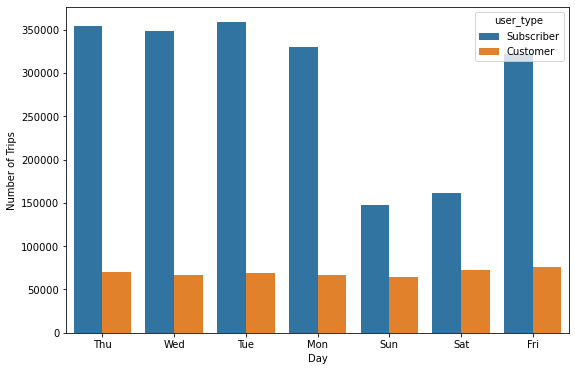

In [3]:
plt.figure(figsize=(9,6));
sb.countplot(data=df, x='day', hue='user_type');
plt.xlabel('Day');
plt.ylabel('Number of Trips');

## Number of trips per month for each user type

> This visualization shows the number of trips per month for both user types. Subscriber Trips were more randomly distributed while Customers' were more concentrated in autumn and peaking in December.

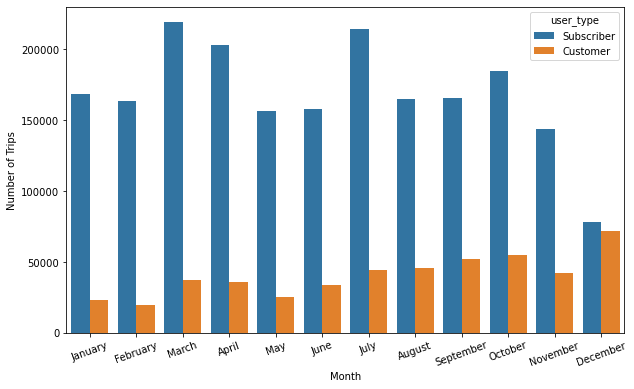

In [4]:
plt.figure(figsize=(10,6));
sb.countplot(data=df, x='month', hue='user_type');
plt.xlabel('Month');
plt.ylabel('Number of Trips');
plt.xticks(rotation=20);

## Trip Duration for Each User Type
> Somewhat counterintuitively, Customers tend to have longer trip durations than Subscribers.

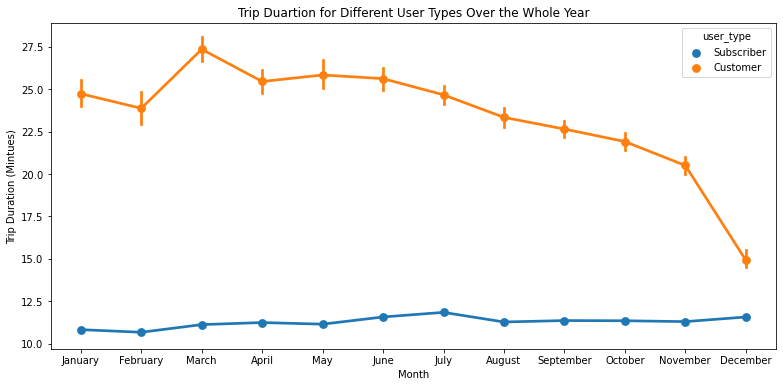

In [5]:
plt.figure(figsize = (13,6));
sb.pointplot(data=df, x='month', y='duration_min', hue='user_type');
plt.title('Trip Duartion for Different User Types Over the Whole Year');
plt.ylabel('Trip Duration (Mintues)');
plt.xlabel('Month');
plt.show();